w, b 값은 트레인 데이터만 갱신한다.

정형 데이터는 전처리 잘해야된다. 전처리 잘 안하면 데이터가 날아가 버린다

일반 적인 이미지 처리 기법은 아니지만, 이미지 처리를 해보겠다.

모델을 처리 하는 방법은 다 똑같다

참조 : https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


In [38]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
#fashion_mnist.load_data() # tuple : 수정 불가
#len(fashion_mnist.load_data()) # len 길이가 2개, 2개가 들어가는것
#(a0, a1),(b0, b1) = fashion_mnist.load_data()

tuple

In [13]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [39]:

np.unique(train_labels, return_counts=True)
# 이런 자료는 많이 사용하기 때문에, 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


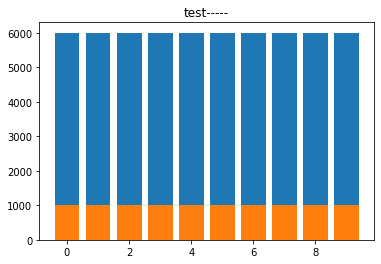

In [40]:
import matplotlib.pyplot as plt

#함수로 지정해서 사용
def cntF(data, title, op=0):
    tmp = np.unique(data, return_counts=True)
    print(tmp)
    plt.bar(tmp[0], tmp[1])
    plt.title(title)
    if op == 1:
        plt.show()
    
cntF(train_labels,'train')
cntF(test_labels,'test-----')

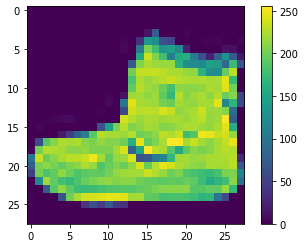

In [41]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# 이미지 숫자 값의 범위를 확인하는 방법
# 그림으로 그리는 방법, min max 값으로 확인 가능
# train_images[0].min(), train_images[0].max()


In [44]:
def rangeChk(data):
    plt.figure()
    plt.imshow(data, cmap='gray')
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
    print(data.min(),'/', data.max())

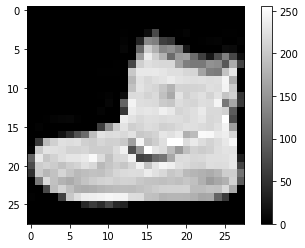

0 / 255


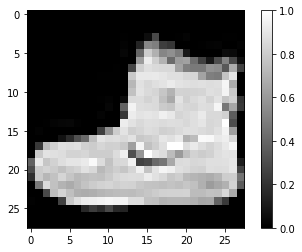

0.0 / 1.0


In [43]:
# rangeChk()

# train_images = train_images/255
# test_images = test_images/255

# rangeChk()

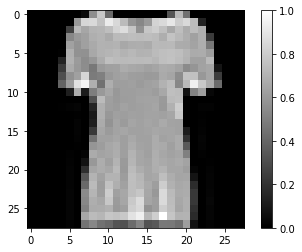

0.0 / 1.0


In [46]:
rangeChk(train_images[10])

In [48]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

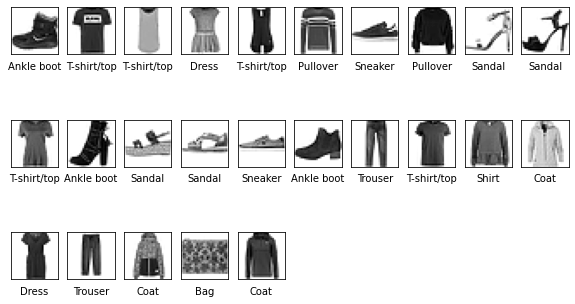

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [52]:
class_names[5]

'Sandal'

In [53]:
#샌들만 뽑아내려면 class name  에서 샌들 찾아서
# 
train_labels[train_labels==5]


array([5, 5, 5, ..., 5, 5, 5], dtype=uint8)

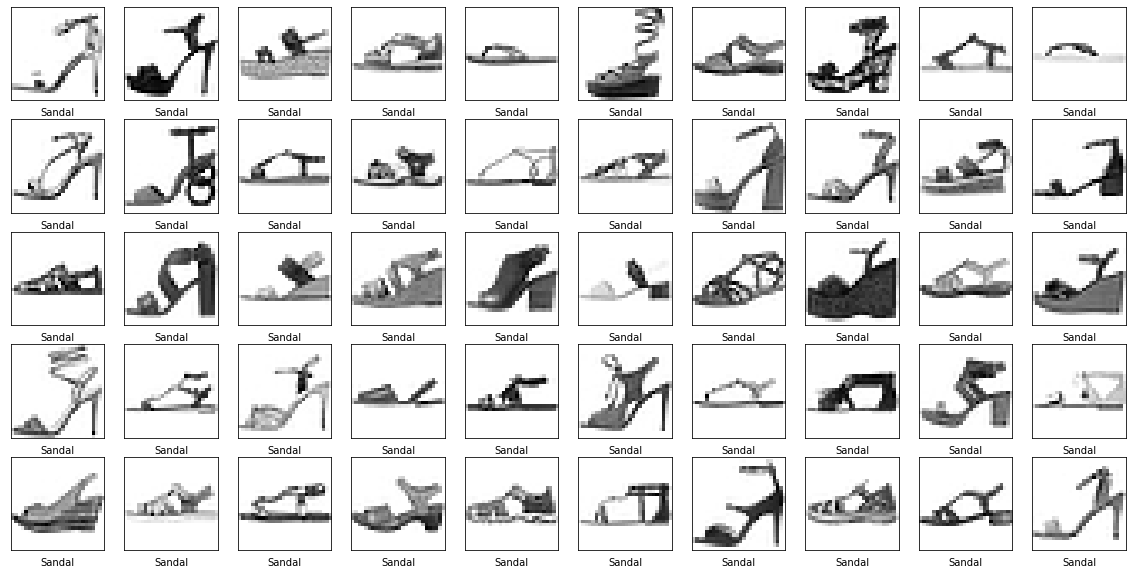

In [55]:
# 구글 검색, 복수의 인덱스값 찾기
# 아래코드는 컴프리핸션(압축)으로 도는 람다로 바꿔서도 작업해야함
findRow=[]
for cnt, x in enumerate(train_labels):
    if x == 5:
        findRow.append(cnt)
        
def chart():
    plt.figure(figsize=(20,10))
    for cnt, i in enumerate(findRow[:50]):
        plt.subplot(5,10,cnt+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    
plt.show()

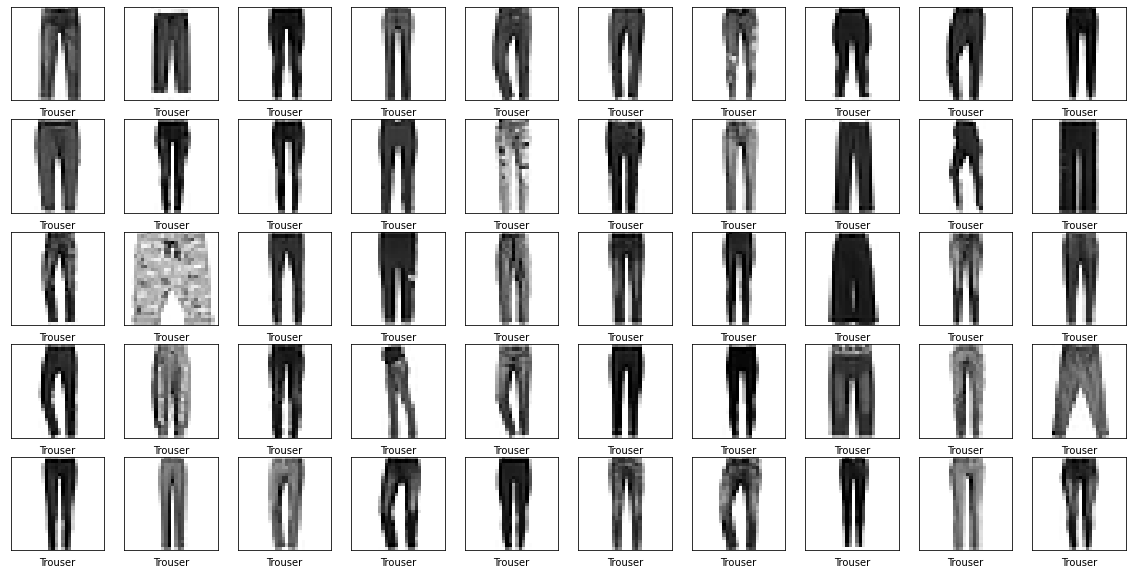

In [61]:
# 윗 코드의 복사본
# 데이터를 보는 방법에 따라 넣는 데이터가 달라진다.

findRow=[]
for cnt, x in enumerate(train_labels):
    if x == 1:
        findRow.append(cnt)

plt.figure(figsize=(20,10))
for cnt, i in enumerate(findRow[:50]):
    plt.subplot(5,10,cnt+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 훈련시킨 상황과 다르게 넣으면, 

In [59]:
print(class_names)
class_names.index('Bag')

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


8

In [ ]:
# 28 * 28  * 128 개의 파라미터, 최종 10개의 소프트맥스로 출력
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# SparseCategoricalCrossentropy 는 y값을 원핫인코딩 안하고 softmax하고자 할때,
# SparseCategoricalCrossentropy(from_logits=True) 위 모델 생성시 출력 레이어에서 softmax 했기 때문에 지워줘도 된다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [73]:
#validation_data=(test_images, test_labels) 모델에 추가하면 따로 스코어를 내지 않아도됨
# batch_size = 32(defult_value)

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/100
1875/1875 [==============================] - 1s 696us/step - loss: 0.4501 - accuracy: 0.8440 - val_loss: 0.4963 - val_accuracy: 0.8288
Epoch 2/100
1875/1875 [==============================] - 1s 693us/step - loss: 0.4479 - accuracy: 0.8434 - val_loss: 0.5157 - val_accuracy: 0.8182
Epoch 3/100
1875/1875 [==============================] - 1s 693us/step - loss: 0.4446 - accuracy: 0.8441 - val_loss: 0.4981 - val_accuracy: 0.8277
Epoch 4/100
1875/1875 [==============================] - 1s 692us/step - loss: 0.4409 - accuracy: 0.8456 - val_loss: 0.5003 - val_accuracy: 0.8265
Epoch 5/100
1875/1875 [==============================] - 1s 692us/step - loss: 0.4388 - accuracy: 0.8466 - val_loss: 0.5013 - val_accuracy: 0.8282
Epoch 6/100
1875/1875 [==============================] - 1s 689us/step - loss: 0.4376 - accuracy: 0.8475 - val_loss: 0.4937 - val_accuracy: 0.8281
Epoch 7/100
1875/1875 [==============================] - 1s 685us/step - loss: 0.4356 - accuracy: 0.8483 - val_loss: 0

1875/1875 [==============================] - 1s 685us/step - loss: 0.4050 - accuracy: 0.8569 - val_loss: 0.4956 - val_accuracy: 0.8327
Epoch 57/100
1875/1875 [==============================] - 1s 691us/step - loss: 0.4039 - accuracy: 0.8571 - val_loss: 0.5011 - val_accuracy: 0.8295
Epoch 58/100
1875/1875 [==============================] - 1s 685us/step - loss: 0.4037 - accuracy: 0.8577 - val_loss: 0.5001 - val_accuracy: 0.8328
Epoch 59/100
1875/1875 [==============================] - 1s 692us/step - loss: 0.4045 - accuracy: 0.8570 - val_loss: 0.4941 - val_accuracy: 0.8320
Epoch 60/100
1875/1875 [==============================] - 1s 684us/step - loss: 0.4052 - accuracy: 0.8570 - val_loss: 0.5029 - val_accuracy: 0.8344
Epoch 61/100
1875/1875 [==============================] - 1s 684us/step - loss: 0.4029 - accuracy: 0.8577 - val_loss: 0.5017 - val_accuracy: 0.8267
Epoch 62/100
1875/1875 [==============================] - 1s 689us/step - loss: 0.4029 - accuracy: 0.8571 - val_loss: 0.5074 

설정 값을 바꿔서 acc 값과 val_acc 값과 오차가 줄도록 

In [76]:
# 28 * 28  * 128 개의 파라미터, 최종 10개의 소프트맥스로 출력
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(14, activation='relu'),
    #tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10)
])

# SparseCategoricalCrossentropy 는 y값을 원핫인코딩 안하고 softmax하고자 할때,
# SparseCategoricalCrossentropy(from_logits=True) 위 모델 생성시 출력 레이어에서 softmax 했기 때문에 지워줘도 된다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [78]:
#validation_data=(test_images, test_labels) 모델에 추가하면 따로 스코어를 내지 않아도됨
# batch_size = 32(defult_value)

model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels))


Epoch 1/100
1875/1875 [==============================] - 1s 657us/step - loss: 0.4305 - accuracy: 0.8508 - val_loss: 0.5040 - val_accuracy: 0.8276
Epoch 2/100
1875/1875 [==============================] - 1s 664us/step - loss: 0.4303 - accuracy: 0.8514 - val_loss: 0.4971 - val_accuracy: 0.8298
Epoch 3/100
1875/1875 [==============================] - 1s 662us/step - loss: 0.4295 - accuracy: 0.8503 - val_loss: 0.5016 - val_accuracy: 0.8287
Epoch 4/100
1875/1875 [==============================] - 1s 670us/step - loss: 0.4291 - accuracy: 0.8506 - val_loss: 0.5124 - val_accuracy: 0.8257
Epoch 5/100
1875/1875 [==============================] - 1s 664us/step - loss: 0.4287 - accuracy: 0.8508 - val_loss: 0.4982 - val_accuracy: 0.8308
Epoch 6/100
1875/1875 [==============================] - 1s 668us/step - loss: 0.4283 - accuracy: 0.8515 - val_loss: 0.5041 - val_accuracy: 0.8286
Epoch 7/100
1875/1875 [==============================] - 1s 670us/step - loss: 0.4274 - accuracy: 0.8513 - val_loss: 0

1875/1875 [==============================] - 1s 661us/step - loss: 0.4093 - accuracy: 0.8565 - val_loss: 0.4902 - val_accuracy: 0.8336
Epoch 57/100
1875/1875 [==============================] - 1s 664us/step - loss: 0.4097 - accuracy: 0.8563 - val_loss: 0.4849 - val_accuracy: 0.8371
Epoch 58/100
1875/1875 [==============================] - 1s 664us/step - loss: 0.4095 - accuracy: 0.8561 - val_loss: 0.4864 - val_accuracy: 0.8358
Epoch 59/100
1875/1875 [==============================] - 1s 668us/step - loss: 0.4090 - accuracy: 0.8559 - val_loss: 0.4877 - val_accuracy: 0.8356
Epoch 60/100
1875/1875 [==============================] - 1s 665us/step - loss: 0.4091 - accuracy: 0.8572 - val_loss: 0.5012 - val_accuracy: 0.8266
Epoch 61/100
1875/1875 [==============================] - 1s 666us/step - loss: 0.4094 - accuracy: 0.8565 - val_loss: 0.4904 - val_accuracy: 0.8364
Epoch 62/100
1875/1875 [==============================] - 1s 671us/step - loss: 0.4085 - accuracy: 0.8569 - val_loss: 0.4907 

오버 피팅 없이 많은 작업을 할 수 있을것 인가?

레이어의 갯수를 조정해보자

baseline model 생성, 컴파일, fit

In [85]:
# baseline model 생성, 성공률과 val_성공률 상관관계에 따라, 오버피팅이 일어난다.
# 배치사이즈에도 연관성이 있을수도 있으므로, 조정해줄것

baseline_model = tf.keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)
])

baseline_model.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics=['accuracy'])

baseline_history = baseline_model.fit(train_images,
                                      train_labels,
                                      epochs=10,                                      
                                      validation_data=(test_images, test_labels),
                                      batch_size=200,
                                      verbose=1)

# batch 사이즈를 늘리면,w 값이 작아지고, 오차가 커진다.
# kernel_regularizer를 l2로 주게 되면, 정확성이 좀 떨어진다.
# 이런 작업을 하는 이유는, dense층을 쌓고 규제를 주고 드롭아웃을 하는 작업을 해보기 위함,
# 이런 작업으로 정확도를 높히는건 어렵다.
# 다른 사람이 만든 성능 좋은 모델을 가져다 쓰는게 가장 좋다.
# loss 값을 신경 안쓰고 작업 했지만, loss 값이 40%라면 줄여야 한다.
# 다양한 모델을 적용해보고 가장 최적의 모델을 찾아야 한다.

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 0.8920 - accuracy: 0.8066 - val_loss: 0.6679 - val_accuracy: 0.8335
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.5676 - accuracy: 0.8551 - val_loss: 0.5353 - val_accuracy: 0.8565
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4862 - accuracy: 0.8640 - val_loss: 0.4901 - val_accuracy: 0.8589
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4382 - accuracy: 0.8729 - val_loss: 0.4552 - val_accuracy: 0.8661
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4150 - accuracy: 0.8753 - val_loss: 0.4512 - val_accuracy: 0.8611
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3976 - accuracy: 0.8784 - val_loss: 0.4308 - val_accuracy: 0.8669
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3858 - accuracy: 0.8822 - val_loss: 0.4593 - val_accuracy: 0.8597
Epoch 

내일 까지 작업을 해야 기본 이미지 학습 방법론을 다 배울수 있다.

이미지 같은 경우 합성곱 신경망을 사용해서 작업하는것을 추천, 현재 까지 배운 내용중에 합성곱은 np.dot내용으로 확인 할 수 있다.

현재 시간은 입력한 그림을 맞추고, 그 그림에 맞는 폴더로 넘어가게 해주기

이 작업 후 모델 튜너를 먼저 해볼것



지금은 작업에 있어서 데이터에 맞았다면 파일로 넘어가게

이 모델은 원핫인코딩을 하지 않고 함수도 loss에서 logic을 준것


In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [87]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 783us/step - loss: 0.4994 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 1s 761us/step - loss: 0.3737 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.3356 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 1s 753us/step - loss: 0.3121 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 1s 761us/step - loss: 0.2955 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 1s 756us/step - loss: 0.2821 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.2697 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 1s 749us/step - loss: 0.2594 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 1s 752us/step - loss: 0.2488 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 1s 751u

In [89]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3276 - accuracy: 0.8871 - 214ms/epoch - 685us/step

Test accuracy: 0.8870999813079834


In [90]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 491us/step


In [91]:
predictions[0]

array([1.1472081e-07, 8.0029275e-11, 5.2457157e-11, 5.8174184e-11,
       5.5099916e-09, 2.5345531e-04, 8.8291628e-08, 9.1137402e-02,
       3.7415560e-08, 9.0860891e-01], dtype=float32)

In [96]:
tmp = np.argmax(predictions[0]) #가장 큰값의 위치는 뭐냐?
tmp

9

In [97]:
class_names[tmp]

'Ankle boot'

In [93]:
test_labels[0] # 9번째는 카테고리에서 뭐냐

9

7


'Sneaker'

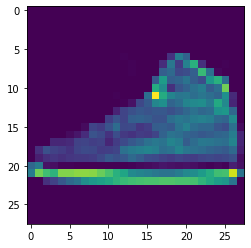

In [103]:
num = 45
plt.imshow(test_images[num])
print(test_labels[num])
class_names[test_labels[num]]

잘 맞췄는지 못 맞췄는지 확인 해보려면 혼돈행렬을 그려보면 알 수 있다.
혼돈행렬도 괜찮지만, 

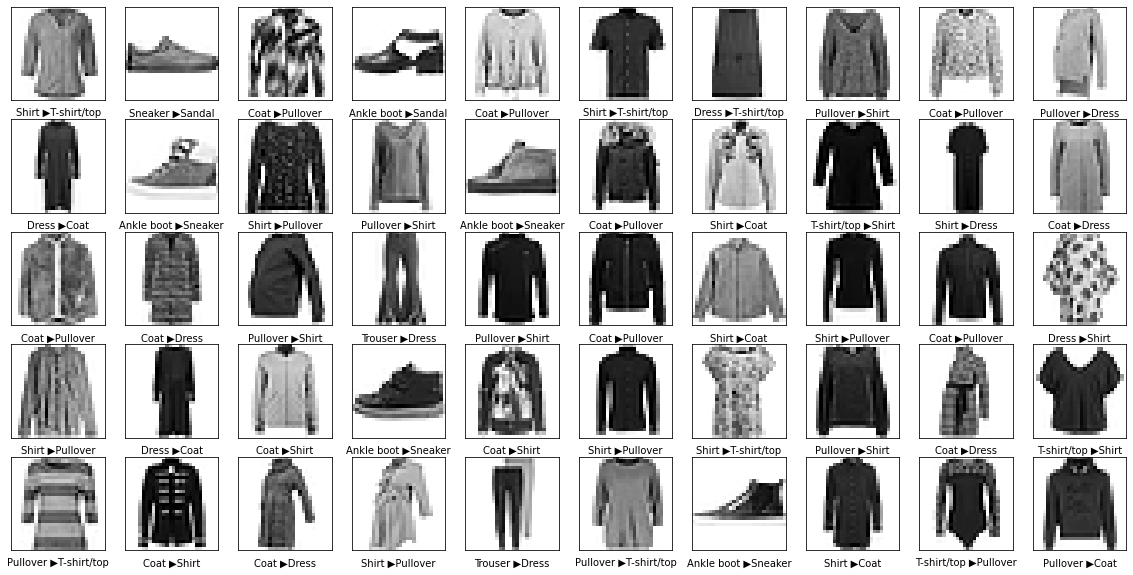

In [128]:
test_labels
result =  [np.argmax(x) for x in predictions]

import pandas as pd

df = pd.DataFrame({'test':test_labels, 'result': result, 'bigo': test_labels==result})
findRow=df[df['bigo'] ==False].index

plt.figure(figsize=(20,10))
for cnt, i in enumerate(findRow[:50]):
    plt.subplot(5,10,cnt+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]]+' ▶'+class_names[df.iloc[i,1]])
plt.show()


0 class error List
(array([2, 3, 4, 5, 6, 7, 8], dtype=int64), array([13, 16,  4,  1, 65,  1,  6], dtype=int64))


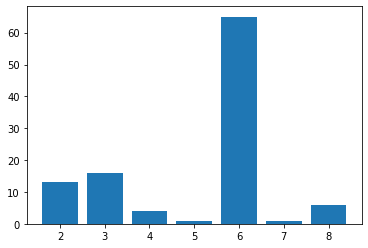

1 class error List
(array([0, 2, 3, 4, 6, 8], dtype=int64), array([ 6,  2, 23,  4,  1,  1], dtype=int64))


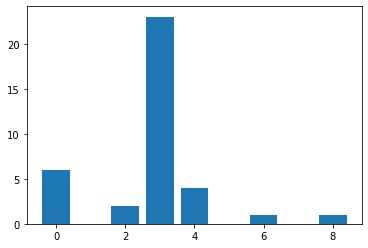

2 class error List
(array([0, 3, 4, 6], dtype=int64), array([18, 13, 57, 57], dtype=int64))


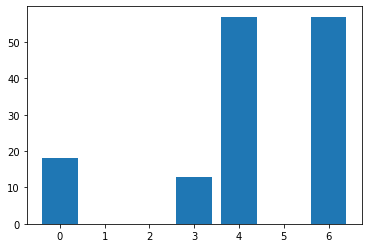

3 class error List
(array([0, 1, 2, 4, 6, 8], dtype=int64), array([25,  3, 11, 29, 19,  4], dtype=int64))


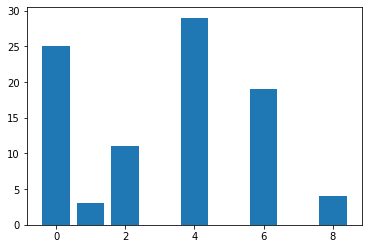

4 class error List
(array([0, 2, 3, 6, 8], dtype=int64), array([  1, 152,  33,  52,   1], dtype=int64))


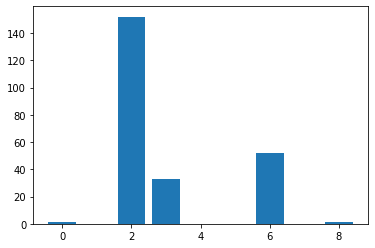

5 class error List
(array([3, 7, 8, 9], dtype=int64), array([ 1, 18,  1, 14], dtype=int64))


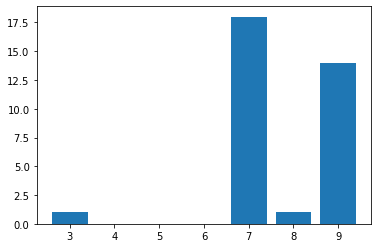

6 class error List
(array([0, 2, 3, 4, 8], dtype=int64), array([159,  95,  28,  66,   7], dtype=int64))


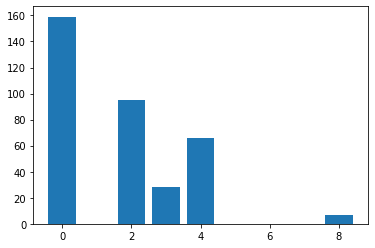

7 class error List
(array([5, 9], dtype=int64), array([15, 20], dtype=int64))


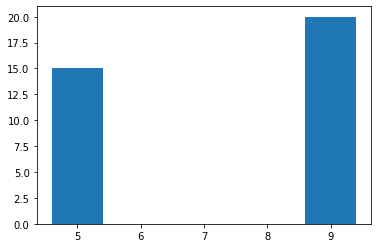

8 class error List
(array([0, 2, 3, 4, 5, 6, 7], dtype=int64), array([5, 8, 3, 2, 2, 5, 3], dtype=int64))


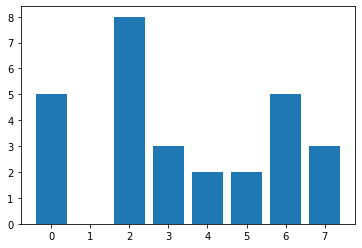

9 class error List
(array([5, 6, 7], dtype=int64), array([ 6,  1, 52], dtype=int64))


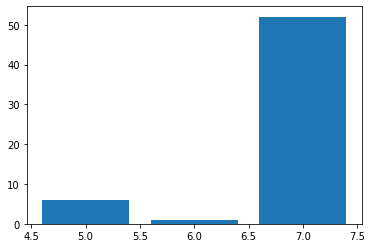

In [141]:
test_labels
result =  [np.argmax(x) for x in predictions]

import pandas as pd

df = pd.DataFrame({'test':test_labels, 'result': result, 'bigo': test_labels==result})
findRow=df[df['bigo'] ==False].index

df.iloc[findRow, 0]==0


errDf = df.iloc[findRow,:]
for x in range(10):
    print(str(x) + ' class error List')
    #display(errDf[errDf['test']==x])
    tmp = errDf[errDf['test']==x]
    tmp_U = np.unique(tmp['result'], return_counts=True)
    print(tmp_U)
    plt.bar(tmp_U[0],tmp_U[1])
    plt.show()


# 트레인 데이터에서도 잘 안맞으면, 가독성이 떨어지는 이미지(데이터)가 들어왔다고 보면 된다.
# 오차 행렬 그리며 끝난 이야기
# 혼돈행렬 그리면 끝난 이야기 이지만, 다양한 방법이 있다고 하는 이야기
# 차트에 대한 부분은 계속 공부해야 할것

In [ ]:
# test_labels
# result =  [np.argmax(x) for x in predictions]

# import pandas as pd

# df = pd.DataFrame({'test':test_labels, 'result': result, 'bigo': test_labels==result})
# findRow=df[df['bigo'] ==False].index

# df.iloc[findRow, 0]==0


# errDf = df.iloc[findRow,:]
# for x in range(10):
#     print(str(x) + ' class error List')
#     #display(errDf[errDf['test']==x])
#     tmp = errDf[errDf['test']==x]
#     tmp_U = np.unique(tmp['result'], return_counts=True)
#     print(tmp_U)
#     plt.bar(tmp_U[0],tmp_U[1])
#     plt.show()

    
# # 트레인 데이터

In [149]:
print(np.unique(df['test'][df['bigo']==False], return_counts=True))
print('-'*100)
np.unique(df['result'][df['bigo']==False], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([106,  37, 145,  91, 239,  34, 355,  35,  28,  59], dtype=int64))
----------------------------------------------------------------------------------------------------


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([214,   3, 281, 117, 162,  24, 200,  74,  20,  34], dtype=int64))

In [150]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# 예측한 데이터를 나눠준다.
# 넘파이 자료라서, 데이터를 이미지로 세이브 해야 되서 좀 그렇다.
# 이미지를 가져와서 28 x 28이미지로 만들자
# 이미지를 가져올때도, 오차율이 낮은 자료를 가져오는게 좋다.


In [171]:
from PIL import Image

img2 = Image.open('sandal2.jpg').transpose(Image.FLIP_LEFT_RIGHT).convert('L').resize((28,28))
img2 = np.array(img2)
img_black2 = 255-img2
#plt.imshow(img_black2, cmap='gray')

img_black2 = img_black2/255.
reimg2 = img_black2.reshape(1,28,28)

class_names[np.argmax(probability_model(reimg2))]

C:\Users\HP\AppData\Local\Temp\ipykernel_6336\3631670722.py:3: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  img2 = Image.open('sandal2.jpg').transpose(Image.FLIP_LEFT_RIGHT).convert('L').resize((28,28))


'Bag'

C:\Users\HP\AppData\Local\Temp\ipykernel_6336\2662074798.py:3: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  img = Image.open('sandal.jpg').transpose(Image.FLIP_LEFT_RIGHT).convert('L').resize((28,28))


'Bag'

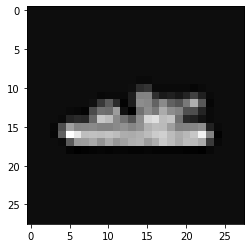

In [169]:
from PIL import Image

img = Image.open('sandal.jpg').transpose(Image.FLIP_LEFT_RIGHT).convert('L').resize((28,28))
img = np.array(img)
img_black = 255-img
plt.imshow(img_black, cmap='gray')
np.shape(img_black.reshape(1,28,28))
img_black = img_black/255.
reimg = img_black.reshape(1,28,28)


class_names[np.argmax(probability_model(reimg))]

In [166]:
probability_model(tmp_san)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)>

## 미션 : 패션 mnist 모델에서 예측한 결과로 폴더 이동


- class_name 별 카테고리 폴더를 제작, (권장사항: cate폴더를 만들고 그 하위에 10개의 카테고리를 제작 할것.)

- img 폴더를 제작해서 그 안에 사진을 여러개 넣음
  - 예측 결과를 높이고 싶다면 모델 학습에 사용되었던 사진과 비슷한 사진으로 작업
  - 예측 결과와 상관없이 전체적인 걸 원한다면 어떤 사진이든 괜찮음
  
- img 폴더에서 첫번째 사진을 읽고 그 사진을 예측
  - 모델 학습과 똑같은 상황을 만들어야됨, 
    - ( 흑백, 28 * 28 사이즈 변경, 255- 빼서 배경 검정색이 되도록 처리)
    - ( / 255. 으로 스케일링)
  - 예측 모델은 (1,28,28)로 넣어줘야함, (사진한장은 28*28 이기 때문에 reshape를 해줘야함)
  - 예측한 자료는 np,argmax로써 가장 값이 큰 위치 인덱스를 가져오고
  - 그 인덱스 값을 class_names 에서 찾아서 결과물의  class_name을 확인 할것
- 그 class_name으로 그 이미지를 이동 또는 복사

## 미션2

- 각 폴더별 데이터 갯수를 차트로
- 일정한 폴더의 갯수가 30개가 넘으면 담당자에게 문자보내기

## 텐서 사이트 실행하고 해석

https://www.tensorflow.org/tutorials/keras/classification?hl=ko

### ▶참고 : 모델 규모별 오버피팅 확인법

In [172]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

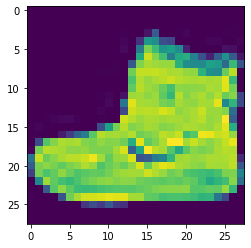

In [176]:
plt.imshow(train_images[0])

In [182]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [183]:
#tmp = Image.fromarray(train_images[0])


#tmp.save('output.png')
class_names[np.argmax(probability_model(train_images[0]))]
plt.imsave('{}.jpeg'.format(), train_images[0])

In [186]:
probability_model(test_images[0])

ValueError: Exception encountered when calling layer "sequential_11" (type Sequential).

Input 0 of layer "dense_26" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (28, 28)

Call arguments received by layer "sequential_11" (type Sequential):
  • inputs=tf.Tensor(shape=(28, 28), dtype=float32)
  • training=False
  • mask=None

In [94]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

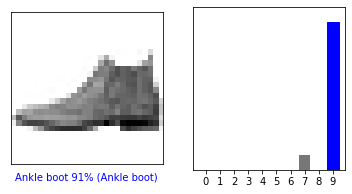

In [95]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()